In [2]:
!pip install pyngrok
!pip install pandas plotly dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 681.2/681.2 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-6.0.0-py3-none-any.whl size=19867 sha256=a4a54abf1737cff520dde20f8cc9d49b5e3d4a995e141baadd6589fd659adc4c
  Stored in directory: /root/.cache/pip/wheels/5c/42/78/0c3d438d7f5730451a25f7ac6cbf4391759d22a67576ed7c2c
Successfully built pyngrok
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 20.7 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 2.3.7
    Uninstalling Werkzeug-2.3.7:
      Successfully uninstalled Werkzeug-2.3.7


In [3]:
import numpy as np
import pandas as pd
import re
import nltk
import gensim
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import dash
import dash_html_components as html
import base64
from pyngrok import ngrok
from dash.dependencies import Input, Output
from dash import dcc
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from gensim import corpora
from io import BytesIO

<ipython-input-3-0372f006c901>:10: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [4]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [5]:
analyzer = SentimentIntensityAnalyzer()

In [6]:
df = pd.read_csv('/content/drive/MyDrive/lc2020.csv', encoding='iso-8859-1')

In [7]:
df

,Date,User,Tweets
0,2020-04-01 00:23:31+00:00,Jennyjen_k,March was 367 days long. We are now finally em...
1,2020-04-01 01:25:41+00:00,flowers197624,I never seen nothing made in China last so lon...
2,2020-04-01 01:26:29+00:00,Rcarvz,@stoolpresidente I wonder how long Covid lives...
3,2020-04-01 01:38:13+00:00,NaniWaialeale,Many have wondered how long COVID-19 lasts on ...
4,2020-04-01 02:43:35+00:00,graymaxwell1,@realDonaldTrump Pre-existing issues caused my...
...,...,...,...
158275,2020-12-31 23:52:55+00:00,BangkokPostNews,If 2020 was wretched for tourists and the flyi...
158276,2020-12-31 23:54:42+00:00,Jimwylie5,Happy new year everyone out there. Been pretty...
158277,2020-12-31 23:55:28+00:00,KymYSmith,"To all those who have died of covid this year,..."
158278,2020-12-31 23:55:54+00:00,colocha_rachel,"@KhesedBein I get that, but I??ve already had..."


In [8]:
def preprocess_tweets(tweet):
  tweet = tweet.lower()
  tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
  tweet = re.sub(r'\W', ' ', tweet)
  tokens = word_tokenize(tweet)
  stop_words = set(stopwords.words('english'))
  tokens = [word for word in tokens if word not in stop_words]
  lemmatizer = WordNetLemmatizer()
  tokens = [lemmatizer.lemmatize(word) for word in tokens]
  return " ".join(tokens)

In [9]:
def get_sentiment_label(score):
  if score >= 0.05:
    return 'positive'
  elif score <= -0.05:
    return 'negative'
  else:
    return 'neutral'

In [10]:
df['processed_tweets'] = df['Tweets'].apply(preprocess_tweets)

In [11]:
print(df['processed_tweets'])

0         march 367 day long finally embarking april 3 6...
1         never seen nothing made china last long covid ...
2         stoolpresidente wonder long covid life car window
3         many wondered long covid 19 last surface preli...
4         realdonaldtrump pre existing issue caused moth...
                                ...                        
158275    2020 wretched tourist flying public 2021 look ...
158276    happy new year everyone pretty ill long covid ...
158277    died covid year forget even though government ...
158278    khesedbein get already covid deal long covid s...
158279    monteithrichie blister177 anthonyfroberts c19 ...
Name: processed_tweets, Length: 158280, dtype: object


In [12]:
df

,Date,User,Tweets,processed_tweets
0,2020-04-01 00:23:31+00:00,Jennyjen_k,March was 367 days long. We are now finally em...,march 367 day long finally embarking april 3 6...
1,2020-04-01 01:25:41+00:00,flowers197624,I never seen nothing made in China last so lon...,never seen nothing made china last long covid ...
2,2020-04-01 01:26:29+00:00,Rcarvz,@stoolpresidente I wonder how long Covid lives...,stoolpresidente wonder long covid life car window
3,2020-04-01 01:38:13+00:00,NaniWaialeale,Many have wondered how long COVID-19 lasts on ...,many wondered long covid 19 last surface preli...
4,2020-04-01 02:43:35+00:00,graymaxwell1,@realDonaldTrump Pre-existing issues caused my...,realdonaldtrump pre existing issue caused moth...
...,...,...,...,...
158275,2020-12-31 23:52:55+00:00,BangkokPostNews,If 2020 was wretched for tourists and the flyi...,2020 wretched tourist flying public 2021 look ...
158276,2020-12-31 23:54:42+00:00,Jimwylie5,Happy new year everyone out there. Been pretty...,happy new year everyone pretty ill long covid ...
158277,2020-12-31 23:55:28+00:00,KymYSmith,"To all those who have died of covid this year,...",died covid year forget even though government ...
158278,2020-12-31 23:55:54+00:00,colocha_rachel,"@KhesedBein I get that, but I??ve already had...",khesedbein get already covid deal long covid s...


In [13]:
df['sentiment_score'] = df['processed_tweets'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

In [14]:
df['sentiment'] = df['sentiment_score'].apply(get_sentiment_label)

In [15]:
print(df[['processed_tweets', 'sentiment']])

                                         processed_tweets sentiment
0       march 367 day long finally embarking april 3 6...   neutral
1       never seen nothing made china last long covid ...  positive
2       stoolpresidente wonder long covid life car window   neutral
3       many wondered long covid 19 last surface preli...   neutral
4       realdonaldtrump pre existing issue caused moth...   neutral
...                                                   ...       ...
158275  2020 wretched tourist flying public 2021 look ...  negative
158276  happy new year everyone pretty ill long covid ...  positive
158277  died covid year forget even though government ...  negative
158278  khesedbein get already covid deal long covid s...  negative
158279  monteithrichie blister177 anthonyfroberts c19 ...  negative

[158280 rows x 2 columns]


In [16]:
word_frequency = pd.Series(' '.join(df['processed_tweets']).split()).value_counts()

In [17]:
word_frequency

covid             121562
long              108786
longcovid          66314
people             31220
amp                21518
                   ...  
carys                  1
bruelladeville         1
opiumhum               1
marcozenker            1
khesedbein             1
Length: 118667, dtype: int64

In [18]:
wordCloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequency)

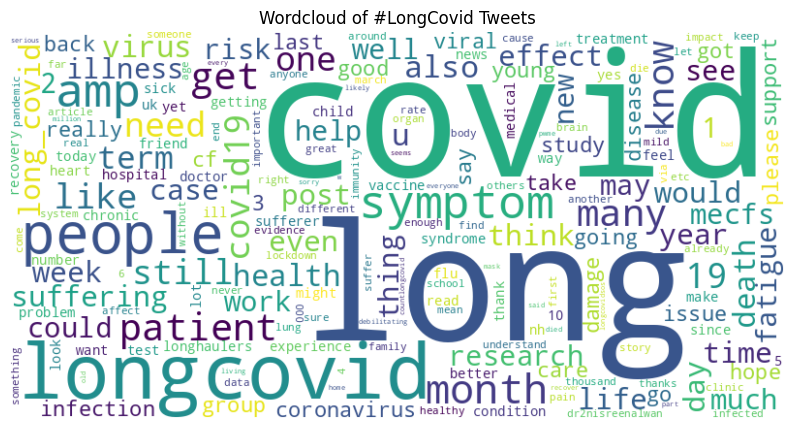

In [19]:
plt.figure(figsize=(10,6))
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.title("Wordcloud of #LongCovid Tweets")
plt.savefig("wordcloud_image.png", bbox_inches="tight", pad_inches=0)
plt.show()

In [20]:
sentiment_counts = df['sentiment'].value_counts()

In [21]:
sentiment_counts

negative    67627
positive    62903
neutral     27750
Name: sentiment, dtype: int64

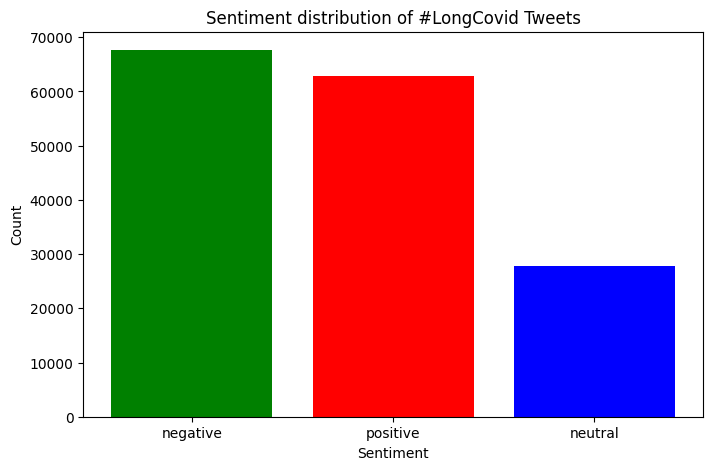

In [22]:
plt.figure(figsize=(8,5))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red', 'blue'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment distribution of #LongCovid Tweets')
plt.show()

In [23]:
tokenized_tweets = [word_tokenize(tweet) for tweet in df['processed_tweets']]

In [24]:
dictionary = corpora.Dictionary(tokenized_tweets)

In [25]:
doc_term_matrix = [dictionary.doc2bow(tweet) for tweet in tokenized_tweets]

In [26]:
num_topics = 5
lda_model = gensim.models.LdaModel(doc_term_matrix, num_topics=num_topics, id2word=dictionary, passes=10)

In [27]:
for idx, topic in lda_model.print_topics():
  print(f"Topic {idx+1}: {topic}")

Topic 1: 0.045*"longcovid" + 0.026*"long_covid" + 0.016*"support" + 0.014*"sufferer" + 0.013*"group" + 0.011*"clinic" + 0.011*"please" + 0.011*"thank" + 0.010*"help" + 0.009*"thanks"
Topic 2: 0.029*"mild" + 0.016*"thousand" + 0.015*"fit" + 0.011*"similar" + 0.010*"mental" + 0.010*"disability" + 0.009*"teacher" + 0.009*"herman" + 0.007*"joanna" + 0.006*"news"
Topic 3: 0.044*"longcovid" + 0.021*"patient" + 0.017*"symptom" + 0.014*"illness" + 0.014*"amp" + 0.013*"post" + 0.010*"covid" + 0.009*"covid19" + 0.009*"disease" + 0.009*"fatigue"
Topic 4: 0.093*"covid" + 0.085*"long" + 0.020*"people" + 0.008*"know" + 0.008*"many" + 0.007*"get" + 0.007*"death" + 0.006*"one" + 0.006*"symptom" + 0.006*"effect"
Topic 5: 0.029*"longcovid" + 0.016*"amp" + 0.015*"day" + 0.010*"like" + 0.010*"back" + 0.010*"still" + 0.009*"hope" + 0.009*"year" + 0.009*"get" + 0.009*"month"


In [28]:
df['topic'] = [sorted(lda_model[doc], key=lambda x: x[1], reverse=True)[0][0] + 1 for doc in doc_term_matrix]

In [29]:
print(df[['processed_tweets', 'topic']])

                                         processed_tweets  topic
0       march 367 day long finally embarking april 3 6...      5
1       never seen nothing made china last long covid ...      4
2       stoolpresidente wonder long covid life car window      4
3       many wondered long covid 19 last surface preli...      4
4       realdonaldtrump pre existing issue caused moth...      4
...                                                   ...    ...
158275  2020 wretched tourist flying public 2021 look ...      4
158276  happy new year everyone pretty ill long covid ...      5
158277  died covid year forget even though government ...      4
158278  khesedbein get already covid deal long covid s...      4
158279  monteithrichie blister177 anthonyfroberts c19 ...      4

[158280 rows x 2 columns]


In [30]:
word_frequency_df = pd.DataFrame({'word': word_frequency.index, 'frequency': word_frequency.values})

In [31]:
word_frequency_df = word_frequency_df.sort_values(by='frequency', ascending=False)

In [32]:
word_frequency_df

,word,frequency
0,covid,121562
1,long,108786
2,longcovid,66314
3,people,31220
4,amp,21518
...,...,...
72496,cornonavirus,1
72497,saskquo,1
72498,franken18866285,1
72499,tireder,1


In [33]:
top_10_frequent = word_frequency_df.head(10)

In [34]:
top_10_frequent

,word,frequency
0,covid,121562
1,long,108786
2,longcovid,66314
3,people,31220
4,amp,21518
5,symptom,20399
6,month,15704
7,get,14520
8,many,14103
9,patient,13758


In [35]:
top_10_words = px.bar(top_10_frequent, x='word', y='frequency', labels={'word': 'Word', 'frequency': 'Frequency'},
             title='Top 10 Words in #LongCovid Tweets', color='frequency',
             color_continuous_scale='Viridis')

In [36]:
top_10_words.update_layout(xaxis_title='Word', yaxis_title='Frequency', title_font_size=20)
top_10_words.show()

In [37]:
df['Date'] = pd.to_datetime(df['Date'])

In [38]:
df

,Date,User,Tweets,processed_tweets,sentiment_score,sentiment,topic
0,2020-04-01 00:23:31+00:00,Jennyjen_k,March was 367 days long. We are now finally em...,march 367 day long finally embarking april 3 6...,0.0000,neutral,5
1,2020-04-01 01:25:41+00:00,flowers197624,I never seen nothing made in China last so lon...,never seen nothing made china last long covid ...,0.7430,positive,4
2,2020-04-01 01:26:29+00:00,Rcarvz,@stoolpresidente I wonder how long Covid lives...,stoolpresidente wonder long covid life car window,0.0000,neutral,4
3,2020-04-01 01:38:13+00:00,NaniWaialeale,Many have wondered how long COVID-19 lasts on ...,many wondered long covid 19 last surface preli...,0.0000,neutral,4
4,2020-04-01 02:43:35+00:00,graymaxwell1,@realDonaldTrump Pre-existing issues caused my...,realdonaldtrump pre existing issue caused moth...,0.0000,neutral,4
...,...,...,...,...,...,...,...
158275,2020-12-31 23:52:55+00:00,BangkokPostNews,If 2020 was wretched for tourists and the flyi...,2020 wretched tourist flying public 2021 look ...,-0.7506,negative,4
158276,2020-12-31 23:54:42+00:00,Jimwylie5,Happy new year everyone out there. Been pretty...,happy new year everyone pretty ill long covid ...,0.9136,positive,5
158277,2020-12-31 23:55:28+00:00,KymYSmith,"To all those who have died of covid this year,...",died covid year forget even though government ...,-0.5719,negative,4
158278,2020-12-31 23:55:54+00:00,colocha_rachel,"@KhesedBein I get that, but I??ve already had...",khesedbein get already covid deal long covid s...,-0.2960,negative,4


In [39]:
tweets_by_date = df.groupby(df['Date'].dt.date).size().reset_index(name='count')

In [40]:
fig_time_series = go.Figure()

In [41]:
fig_time_series.add_trace(go.Scatter(x=tweets_by_date['Date'], y=tweets_by_date['count'],
                         mode='lines+markers', line=dict(color='blue'), name='Number of tweets'))

In [42]:
fig_time_series.update_layout(title='Number of #LongCovid Tweets Over Time',
                  xaxis_title='Date', yaxis_title='Number of Tweets',
                  title_font_size=20, xaxis=dict(type='category'))
fig_time_series.show()

In [43]:
with open("wordcloud_image.png", "rb") as img_file:
    wordcloud_base64 = base64.b64encode(img_file.read()).decode()

In [44]:
app = dash.Dash('LongCovid')

app.layout = html.Div(children=[
    html.H1("Interactive #LongCovid Dashboard"),

    html.H2("Word Cloud of #LongCovid Tweets"),
    #html.Img(src="wordcloud_image.png"),
    html.Div(
        style={
            'width': '800px',
            'height': '400px',
            'background-image': f'url(data:image/png;base64,{wordcloud_base64})',
            'background-size': 'cover',
        }
    ),

    html.H2("Top 10 Words in #LongCovid Tweets"),
    dcc.Graph(id='bar-chart', figure=top_10_words),

    html.H2("Number of #LongCovid Tweets Over Time"),
    dcc.Graph(id='time-series', figure=fig_time_series),
])

if __name__ == '__main__':
  app.run_server(debug=True)

<IPython.core.display.Javascript object>